In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json
import pandas as pd
import numpy as np
from datasets import load_dataset

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))

import debias_vsi as dv

In [3]:
df = dv.get_vsi_with_scores()
df

Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/bld_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 14271.05it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/blk_sims_3q_10k_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15897.92it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 15923.13it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/cambrian-s_blind.jsonl: 100%|██████████| 5130/5130 [00:00<00:00, 16005.59it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/gemini-1.5_pro.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 12275.55it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data/ref_evals/llava_vid_7b.jsonl: 100%|██████████| 5156/5156 [00:00<00:00, 14831.57it/s]
Evaluating /Users/ebrown/workspace/vsibench_debiased_internal/data

Loaded 5130 files. Loading VSI-Bench...


,id,dataset,scene_name,question_type,question,ground_truth,options,bld_sims_3q_10k_blind,blk_sims_3q_10k_blind,cambrian-s,...,rgb_sims_3q_25k,rgb_sims_3q_25k_blind,rgb_sims_manV2_5k,rgb_sims_manV2_5k_blind,vsi_train_10k,vsi_train_10k_blind,vsi_train_50k,vsi_train_50k_blind,vsi_train_5k,vsi_train_5k_blind
0,0,arkitscenes,41069025,object_counting,How many table(s) are in this room?,4,None,0.0,0.0,0.1,...,0.1,0.0,0.1,0.0,0.1,0.1,0.1,0.1,0.1,0.1
1,1,arkitscenes,41069025,object_counting,How many chair(s) are in this room?,2,None,0.1,0.1,1.0,...,0.1,0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,1.0
2,2,arkitscenes,41069043,object_counting,How many table(s) are in this room?,2,None,0.1,0.1,1.0,...,1.0,0.1,1.0,0.1,1.0,1.0,1.0,1.0,1.0,1.0
3,3,arkitscenes,41125700,object_counting,How many sofa(s) are in this room?,2,None,0.1,0.1,1.0,...,0.1,0.1,0.1,0.1,1.0,1.0,1.0,1.0,1.0,1.0
4,4,arkitscenes,41125700,object_counting,How many table(s) are in this room?,3,None,0.0,0.0,0.4,...,0.4,0.0,0.4,0.0,0.4,0.4,0.4,0.4,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5125,5151,scannet,scene0196_00,route_planning,You are a robot beginning at the trash bin nea...,C,"[A. Turn Right, Turn Left, B. Turn Right, Turn...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5126,5152,scannet,scene0378_01,route_planning,You are a robot beginning at the door and faci...,A,"[A. Turn Left, Turn Left, Turn Left, B. Turn L...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5127,5153,arkitscenes,47331654,route_planning,You are a robot beginning at the heater and fa...,D,"[A. Turn Left, Turn Right, B. Turn Back, Turn ...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5128,5154,arkitscenes,42445026,route_planning,You are a robot beginning at the doorframe and...,C,"[A. Turn Left, B. Turn Back, C. Turn Right]",1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


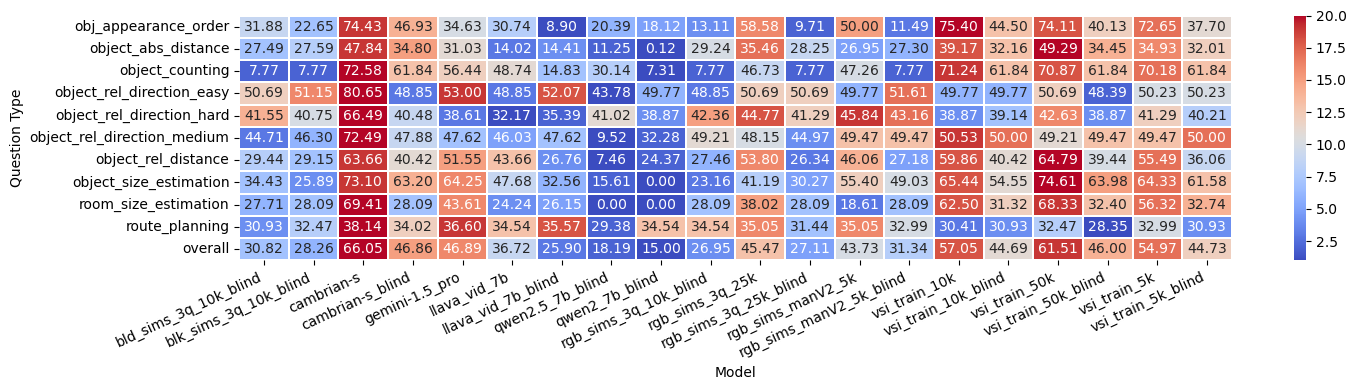

In [4]:
dv.visualize_model_scores(df);

## Route Planning

In [5]:
qdf = df[df["question_type"] == "route_planning"].copy()

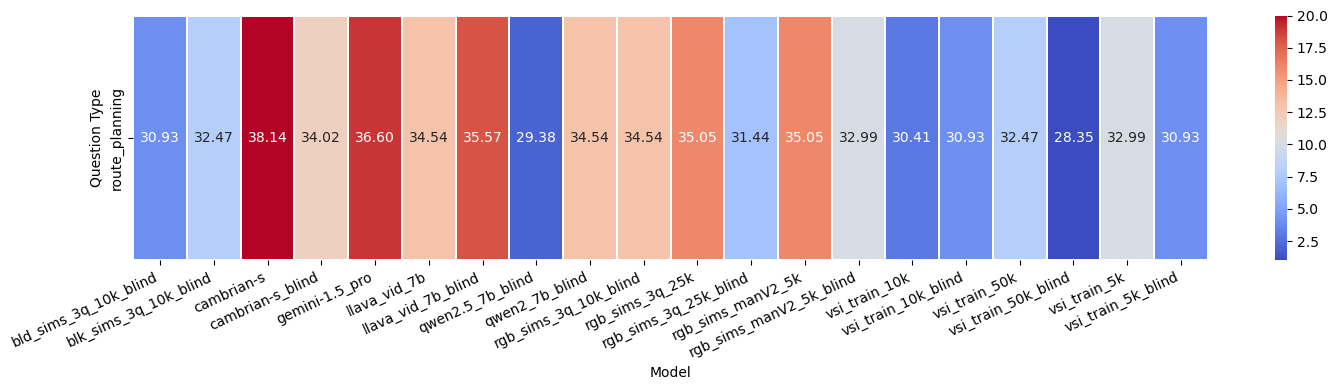

In [6]:
dv.visualize_model_scores(qdf);

In [7]:
qdf.columns

Index(['id', 'dataset', 'scene_name', 'question_type', 'question',
       'ground_truth', 'options', 'bld_sims_3q_10k_blind',
       'blk_sims_3q_10k_blind', 'cambrian-s', 'cambrian-s_blind',
       'gemini-1.5_pro', 'llava_vid_7b', 'llava_vid_7b_blind',
       'qwen2.5_7b_blind', 'qwen2_7b_blind', 'rgb_sims_3q_10k_blind',
       'rgb_sims_3q_25k', 'rgb_sims_3q_25k_blind', 'rgb_sims_manV2_5k',
       'rgb_sims_manV2_5k_blind', 'vsi_train_10k', 'vsi_train_10k_blind',
       'vsi_train_50k', 'vsi_train_50k_blind', 'vsi_train_5k',
       'vsi_train_5k_blind'],
      dtype='object')

In [8]:
i=0
qdf["question"].iloc[i], qdf["options"].iloc[i].tolist(), qdf["ground_truth"].iloc[i],

("You are a robot beginning at the bed facing the tv. You want to navigate to the toilet. You will perform the following actions (Note: for each [please fill in], choose either 'turn back,' 'turn left,' or 'turn right.'): 1. Go forward until the TV 2. [please fill in] 3. Go forward until the shower 4. [please fill in] 5. Go forward until the toilet. You have reached the final destination.",
 ['A. Turn Back, Turn Left',
  'B. Turn Left, Turn Left',
  'C. Turn Left, Turn Right',
  'D. Turn Right, Turn Right'],
 'C')

In [9]:
import re

## question format: "What is the length of the longest dimension (length, width, or height) of the OBJECT, measured in centimeters?'"
## question format: "How many OBJECT(s) are in this room?"
## question format: "Measuring from the closest point of each object, what is the distance between the sofa and the stove (in meters)?"
# question format: "Measuring from the closest point of each object, which of these objects (chair, stool, stove, sofa) is the closest to the tv?"


# You are a robot beginning at the {bed} facing the {tv}. You want to navigate to the {toilet}.

# qdf[["object_1", "object_2", "object_3", "object_4", "target_object"]] = qdf["question"].str.extract(r'which of these objects \((.*?), (.*?), (.*?), (.*?)\) is the closest to the (.*?)\?$')

# qdf[["beginning_object", "facing_object", "target_object"]] = qdf["question"].str.extract(r'You are a robot beginning at the (.*?) facing the (.*?)\. You want to navigate to the (.*?)\.')
# qdf[["beginning_object", "facing_object", "target_object"]] = qdf["question"].str.extract(r'You are a robot beginning at the (.*?) (?:facing the|facing to|facing towards the) (.*?)\. You want to navigate to the (.*?)\.')
# qdf[["beginning_object", "facing_object", "target_object"]] = qdf["question"].str.extract(r'You are a robot beginning at the (.*?) (?:facing the|facing to|facing towards the|facing|with your back to the) (.*?)\. You want to navigate to the (.*?)\.')
qdf[["beginning_object", "facing_object", "target_object"]] = qdf["question"].str.extract(r'You are a robot beginning (?:at|by) the (.*?) (?:facing the|facing to|facing towards the|facing|with your back to the) (.*?)\. You want to navigate to the (.*?)\.')

for col in ["beginning_object", "facing_object", "target_object"]:
    qdf[col] = qdf[col].str.replace(r" and", "", regex=True)
    # remove "the " only if it is at the beginning of the string
    qdf[col] = qdf[col].str.replace(r"^the ", "", regex=True)


qdf["gt_idx"] = qdf["ground_truth"].apply(lambda x: "ABCD".index(x))
qdf["gt_option"] = qdf.apply(lambda row: row["options"][row["gt_idx"]].split(". ")[-1], axis=1)
qdf["num_gt_steps"] = qdf["gt_option"].apply(lambda x: len(x.split(", ")))
# qdf["tgt_opt_pair"] = qdf.apply(lambda row: "-".join(sorted([row["target_object"], row["gt_option"]])), axis=1)
# qdf["tgt_gt_pair"] = qdf.apply(lambda row: "-".join(sorted([row["target_object"], row["gt_object"]])), axis=1)
# qdf["tgt_gt_ord_pair"] = qdf.apply(lambda row: row["target_object"] + "-" + row["gt_object"], axis=1)

# for i in range(4):
#     assert (qdf["options"].apply(lambda x: x[i].split(". ")[-1]) == qdf[f"object_{i+1}"]).all()
# # --> it seems that the objects are always in the same order as the options

qdf.iloc[0]

id                                                                      4959
dataset                                                          arkitscenes
scene_name                                                          42446167
question_type                                                 route_planning
question                   You are a robot beginning at the bed facing th...
ground_truth                                                               C
options                    [A. Turn Back, Turn Left, B. Turn Left, Turn L...
bld_sims_3q_10k_blind                                                    0.0
blk_sims_3q_10k_blind                                                    0.0
cambrian-s                                                               1.0
cambrian-s_blind                                                         1.0
gemini-1.5_pro                                                           1.0
llava_vid_7b                                                             0.0

In [10]:
qdf[qdf[["beginning_object", "facing_object", "target_object"]].isnull().any(axis=1)]["question"].tolist()

[]

In [11]:
qdf["num_gt_steps"].value_counts()

num_gt_steps
2    80
1    76
3    33
4     5
Name: count, dtype: int64

In [12]:
qdf["gt_option"].unique()

array(['Turn Left, Turn Right', 'Turn Right, Turn Left', 'Turn Back',
       'Turn Right, Turn Left, Turn Left', 'Turn Left', 'Turn Right',
       'Turn Left, Turn Left', 'Turn Right, Turn Right',
       'Turn Back, Turn Left', 'Turn Back, Turn Right',
       'Turn Right, Turn Right, Turn Left',
       'Turn Back, Turn Right, Turn Right',
       'Turn Right, Turn Left, Turn Right',
       'Turn Back, Turn Left, Turn Right, Turn Right',
       'Turn Back, Turn Left, Turn Left',
       'Turn Left, Turn Left, Turn Left',
       'Turn Right, Turn Back, Turn Left',
       'Turn Right, Turn Right, Turn Right',
       'Turn Left, Turn Right, Turn Left, Turn Left',
       'Turn Right, Turn Right, Turn Left, Turn Left',
       'Turn Back, Turn Left, Turn Right',
       'Turn Left, Turn Right, Turn Left',
       'Turn Left, Turn Left, Turn Right',
       'Turn Right, Turn Right, Turn Left, Turn Right',
       'Turn Back, Turn Right, Turn Left',
       'Turn Left, Turn Right, Turn Right'], dtype=

In [13]:
# qdf["beginning_object"].unique(), \
qdf["facing_object"].unique(), \
qdf["target_object"].unique()

(array(['tv', 'bed', 'heater', 'table', 'column', 'fireplace', 'window',
        'fan beside the boxes', 'brown single-seat sofa',
        'washing machine', 'kitchen windows', 'washer', 'TV',
        'closest sofa', 'boxes', 'door', 'desk', 'stool', 'bookshelf',
        'white table', 'lamp', 'nearest monitor', 'farthest sofa',
        'drawing', 'whiteboard', 'windows', 'toilet', 'cabinet',
        'trash bin next to the door', 'sink', 'closet', 'dining table',
        'mirror', 'waste bin', 'bathtub', 'display cabinet',
        'standing lamps', 'teddy bear the windows', 'plant on the table',
        'refrigerator', 'into the bathroom', 'fridge',
        'green plants on top of cabinet', 'outside', 'board', 'nightstand',
        'computer', 'into the room', 'wall behind the sofa',
        'electronic white board', 'speakers', 'nearest red wall', 'stove',
        'red chair', 'toilet paper', 'blackboard',
        'whiteboard near the electric fan', 'open door',
        'cabinet next 

In [14]:
qdf.dataset.value_counts()

dataset
arkitscenes    104
scannet         64
scannetpp       26
Name: count, dtype: int64

In [15]:
qdf["ground_truth"].value_counts()

ground_truth
A    57
B    56
C    53
D    28
Name: count, dtype: int64

In [16]:
qdf["gt_option"].value_counts()

gt_option
Turn Right                                       37
Turn Left                                        20
Turn Back                                        19
Turn Left, Turn Right                            16
Turn Back, Turn Right                            16
Turn Right, Turn Left                            14
Turn Right, Turn Right                           13
Turn Back, Turn Left                             13
Turn Left, Turn Left                              8
Turn Left, Turn Left, Turn Left                   6
Turn Right, Turn Left, Turn Left                  5
Turn Right, Turn Right, Turn Left                 4
Turn Left, Turn Right, Turn Left                  3
Turn Right, Turn Left, Turn Right                 2
Turn Back, Turn Right, Turn Right                 2
Turn Back, Turn Left, Turn Left                   2
Turn Right, Turn Right, Turn Right                2
Turn Right, Turn Right, Turn Left, Turn Right     2
Turn Left, Turn Left, Turn Right                  2
Tu

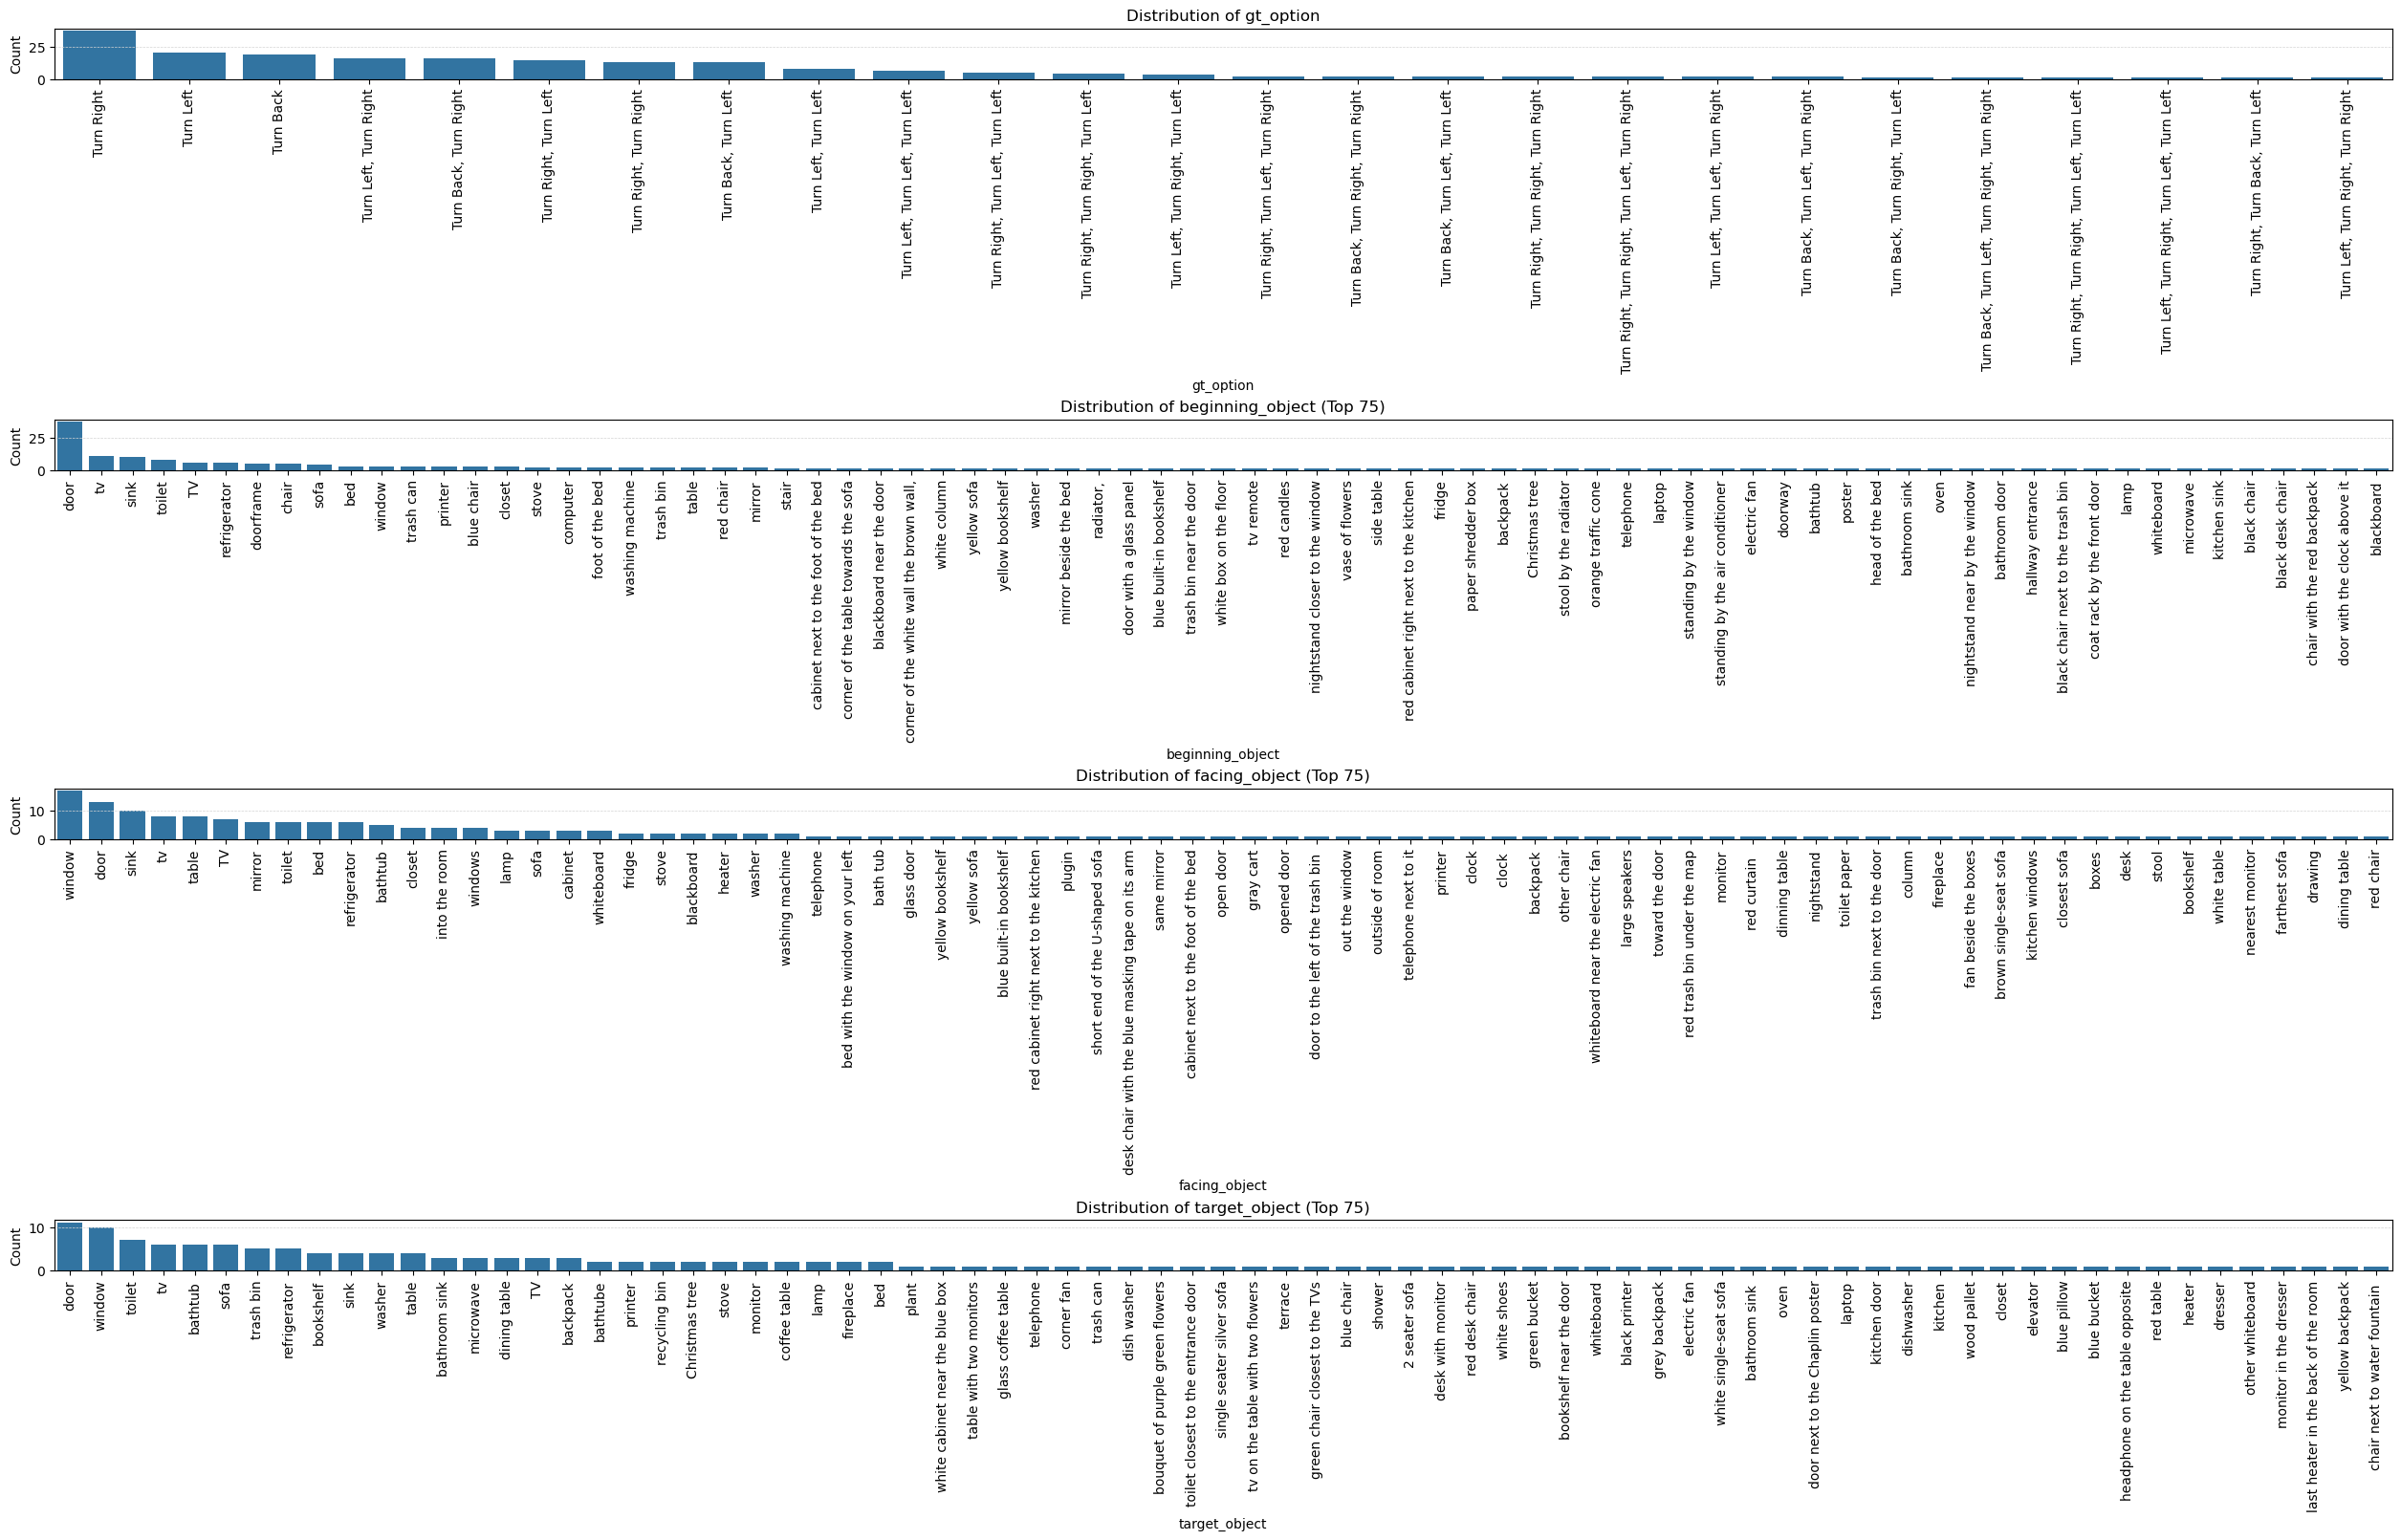

In [17]:
cols = [
    "gt_option",
    "beginning_object",
    "facing_object",
    "target_object",
]

fig, axes = plt.subplots(len(cols), 1, figsize=(25, 4 * len(cols)), constrained_layout=True)
if len(cols) == 1:
    axes = [axes]

max_k = 75
for i, col in enumerate(cols):
    top_values = qdf[col].value_counts().head(max_k).index
    sns.countplot(data=qdf[qdf[col].isin(top_values)], x=col, order=top_values, ax=axes[i])
    title = f"Distribution of {col}"
    if len(top_values) == max_k:
        title += f" (Top {max_k})"
    axes[i].grid(visible=True, which='major', axis='y', color='lightgray', linestyle='--', linewidth=0.5)
    axes[i].set_title(title)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)

plt.show()

In [18]:
len(qdf)

194

In [19]:
pd.set_option('display.max_rows', 100)
budget = 44

Removed 19 samples from the dataset. Now 175 samples remain.


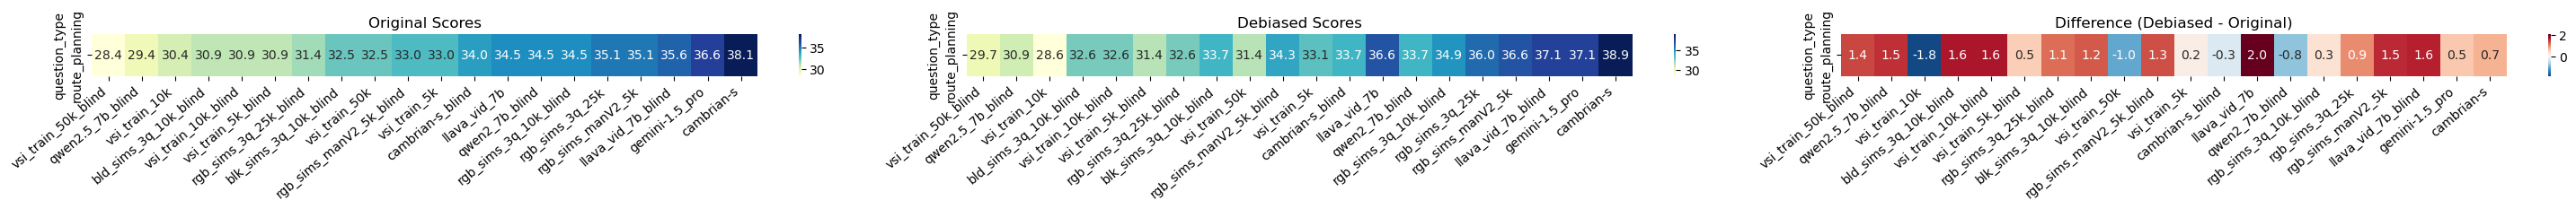

In [20]:
ids = dv.filter_route_planning_v1(qdf, budget=budget)
deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
removed_qdf = qdf.loc[qdf["id"].isin(ids)]
print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
dv.visualize_debiasing_impact(qdf, deb_qdf);

Removed 44 samples from the dataset. Now 150 samples remain.
Removed 44 samples from the dataset. Now 150 samples remain.
Removed 44 samples from the dataset. Now 150 samples remain.


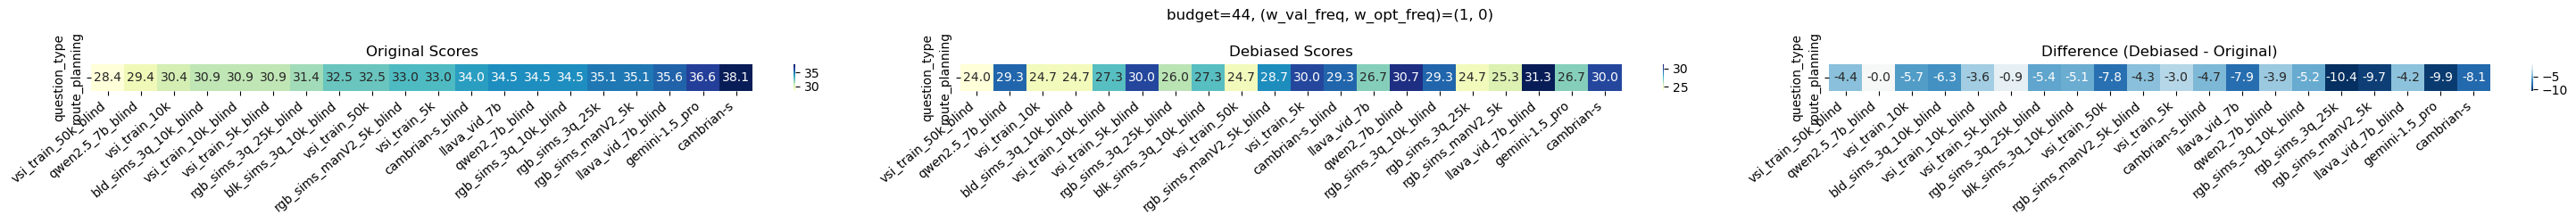

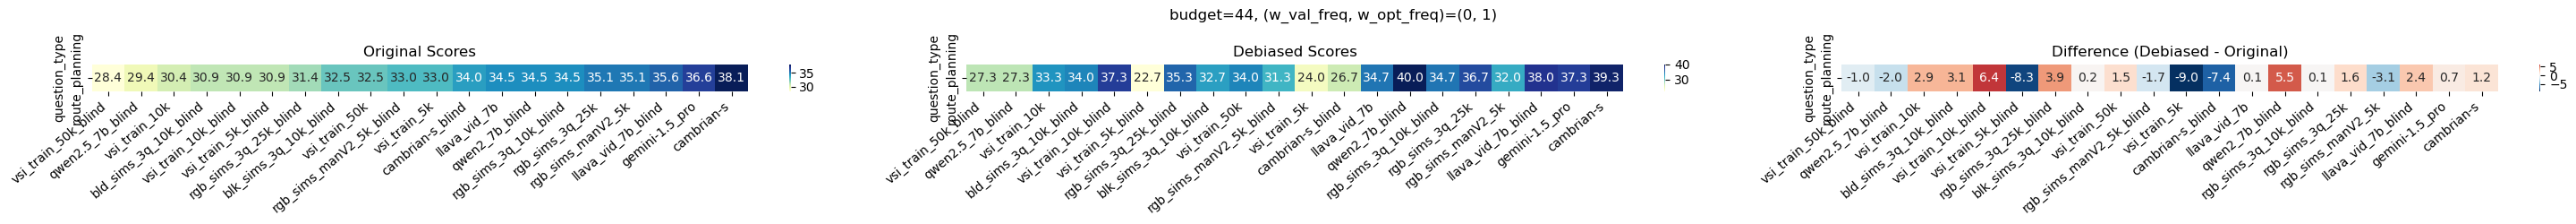

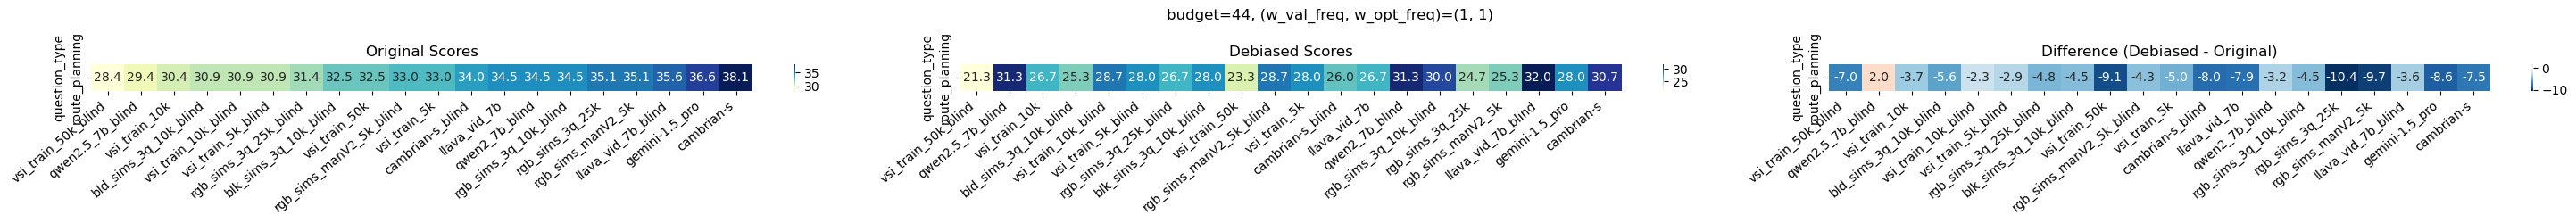

In [21]:
for (w_val_freq, w_opt_freq) in (
    (1, 0),
    (0, 1),
    (1, 1),
):

    ids = dv.filter_route_planning_gt_freq(qdf, budget=budget, w_val_freq=w_val_freq, w_opt_freq=w_opt_freq)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, (w_val_freq, w_opt_freq)=({w_val_freq}, {w_opt_freq})");


Removed 44 samples from the dataset. Now 150 samples remain.
Removed 44 samples from the dataset. Now 150 samples remain.
Removed 44 samples from the dataset. Now 150 samples remain.
Removed 44 samples from the dataset. Now 150 samples remain.
Removed 44 samples from the dataset. Now 150 samples remain.
Removed 44 samples from the dataset. Now 150 samples remain.
Removed 44 samples from the dataset. Now 150 samples remain.


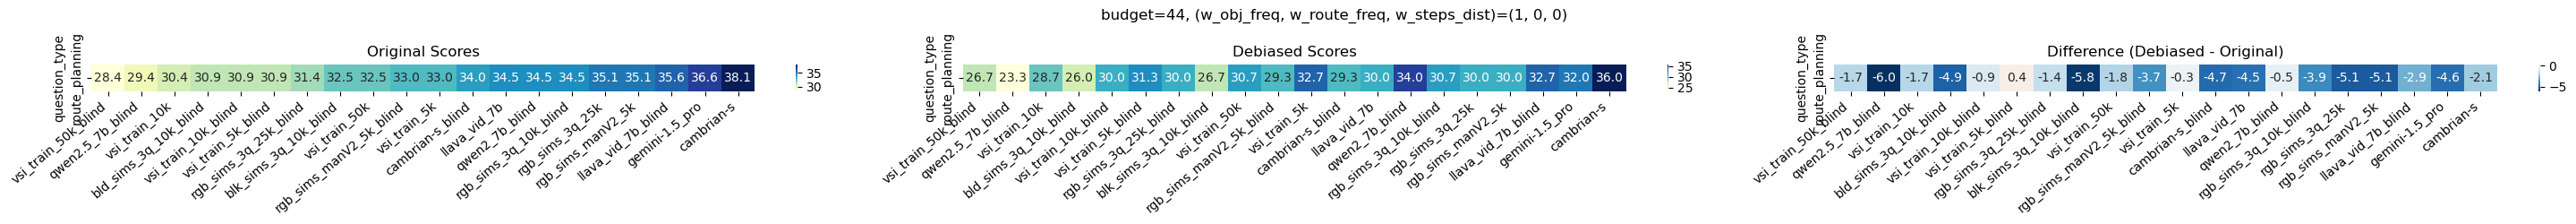

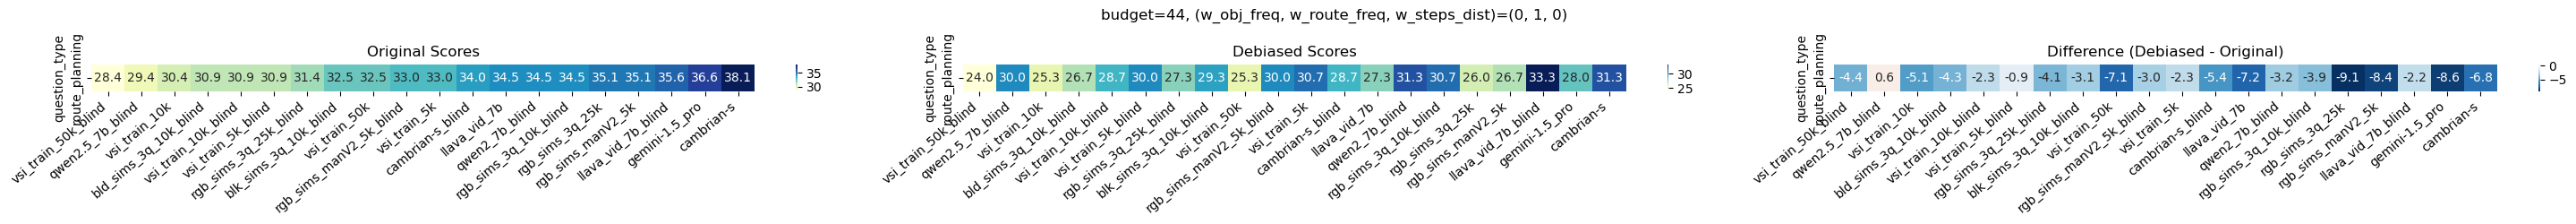

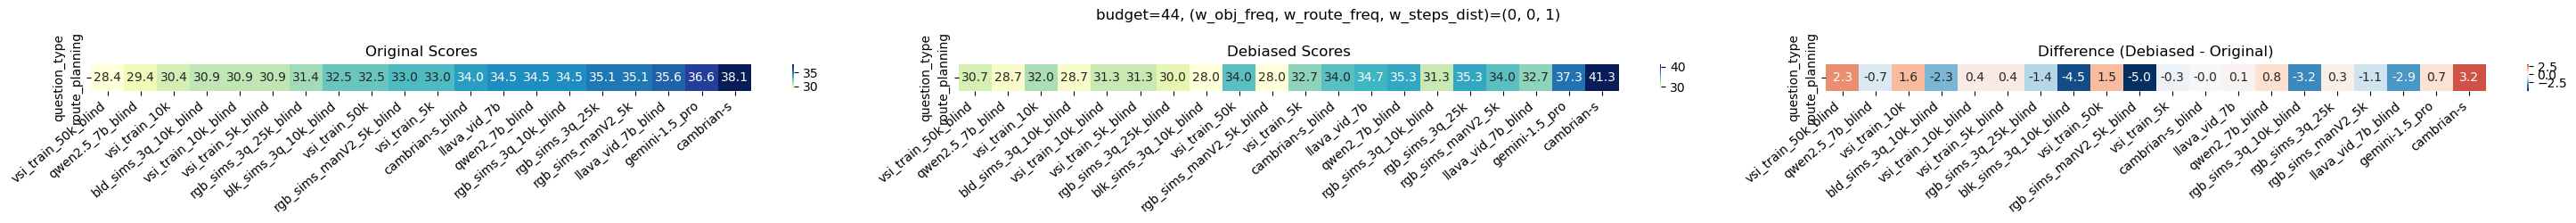

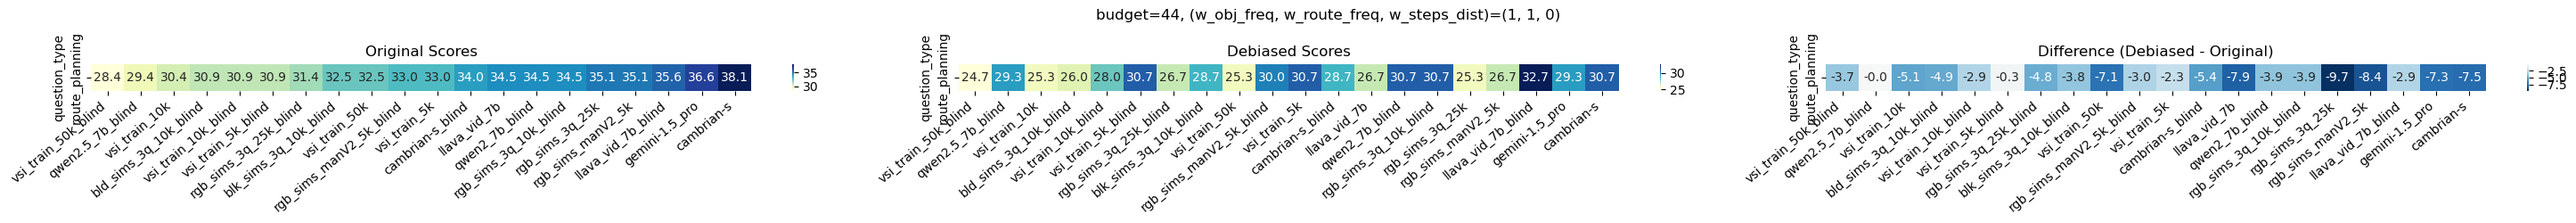

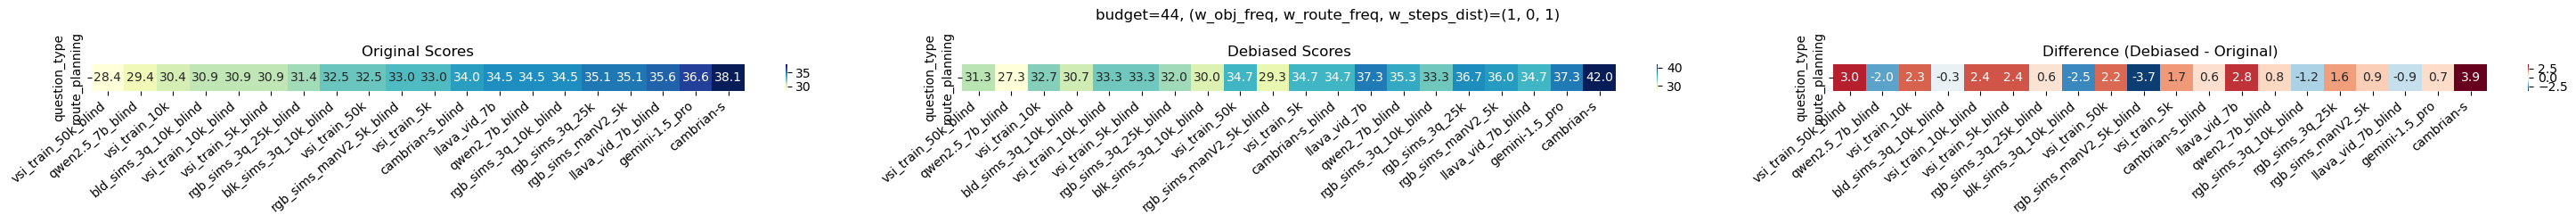

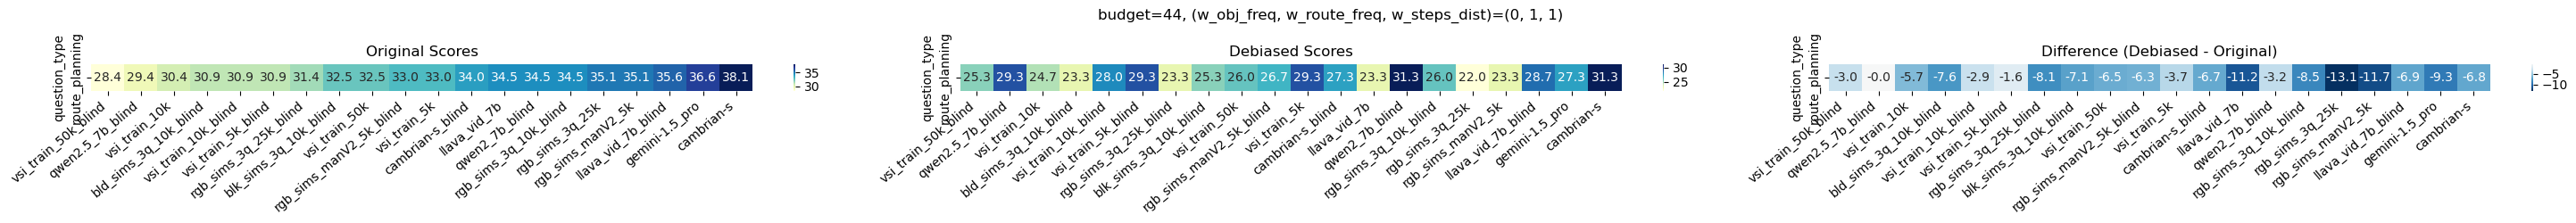

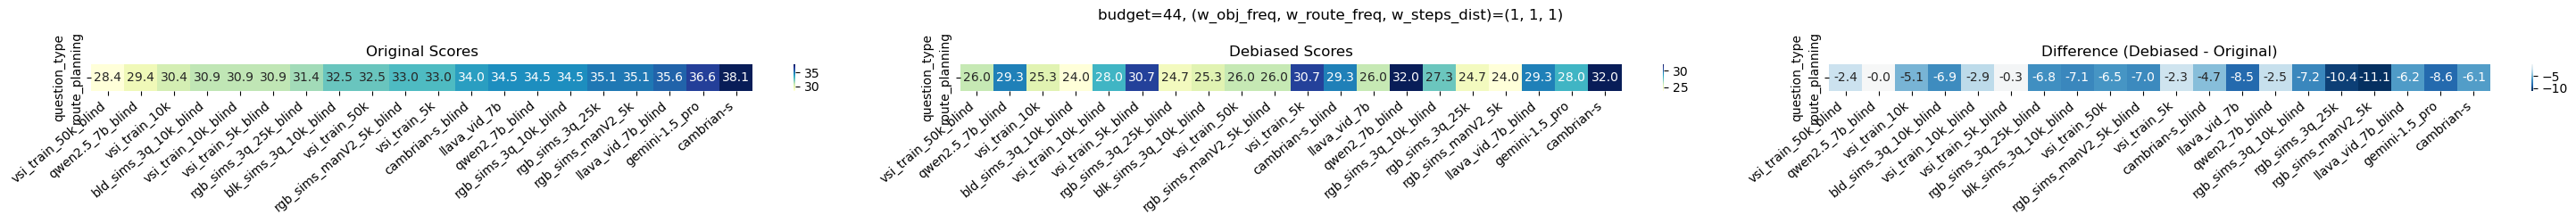

In [22]:
for (w_obj_freq, w_route_freq, w_steps_dist) in (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
):

    ids = dv.filter_route_planning_v2(qdf, budget=budget, w_obj_freq=w_obj_freq, w_route_freq=w_route_freq, w_steps_dist=w_steps_dist)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, (w_obj_freq, w_route_freq, w_steps_dist)=({w_obj_freq}, {w_route_freq}, {w_steps_dist})");

Route Planning Min count: 28, Counts: {'A': 57, 'B': 56, 'C': 53, 'D': 28}
Total route_planning samples identified for full balancing: 82
Actual number selected (prioritizing high secondary score): 82
Removed 80 samples from the dataset. Now 114 samples remain.
Route Planning Min count: 28, Counts: {'A': 57, 'B': 56, 'C': 53, 'D': 28}
Total route_planning samples identified for full balancing: 82
Actual number selected (prioritizing high secondary score): 82
Removed 80 samples from the dataset. Now 114 samples remain.
Route Planning Min count: 28, Counts: {'A': 57, 'B': 56, 'C': 53, 'D': 28}
Total route_planning samples identified for full balancing: 82
Actual number selected (prioritizing high secondary score): 82
Removed 80 samples from the dataset. Now 114 samples remain.
Route Planning Min count: 28, Counts: {'A': 57, 'B': 56, 'C': 53, 'D': 28}
Total route_planning samples identified for full balancing: 82
Actual number selected (prioritizing high secondary score): 82
Removed 80 sa

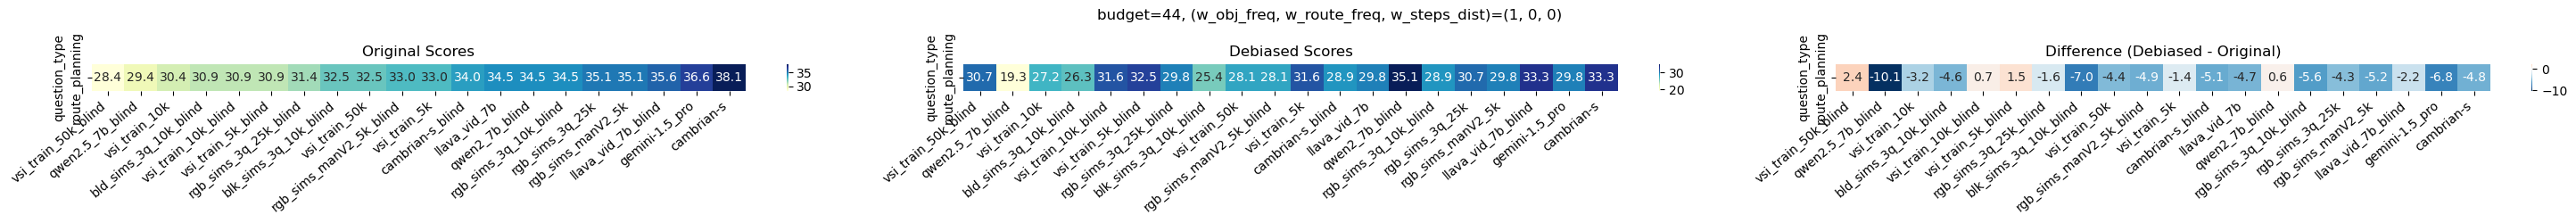

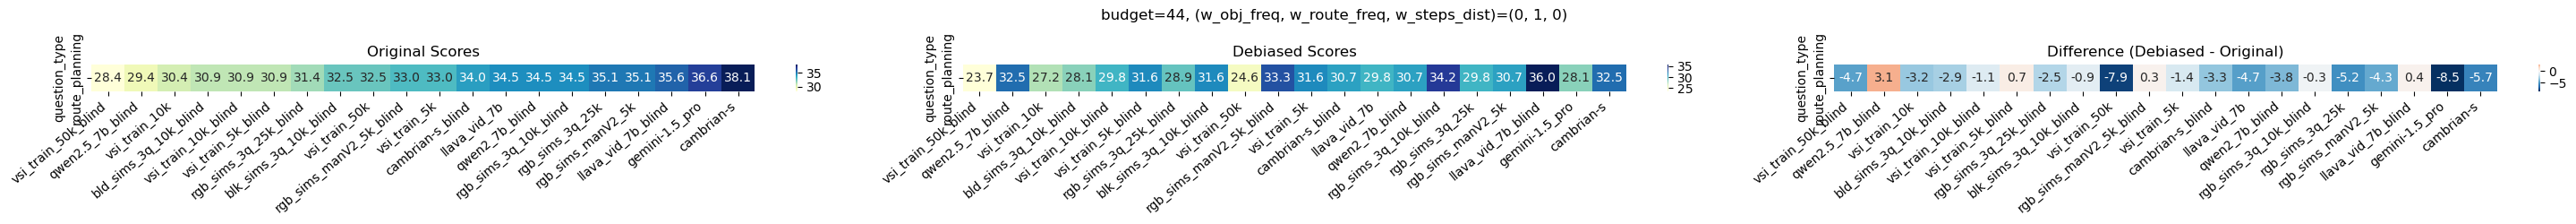

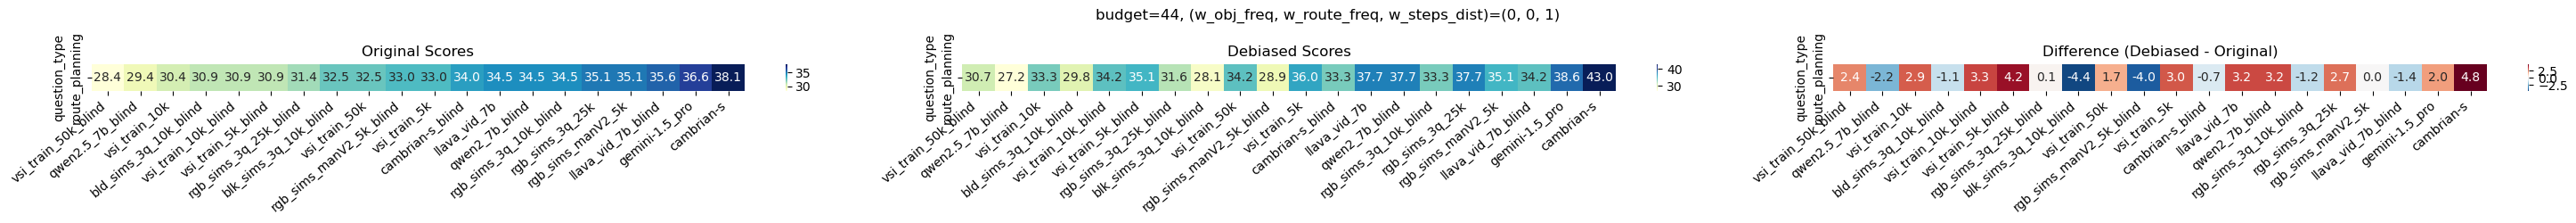

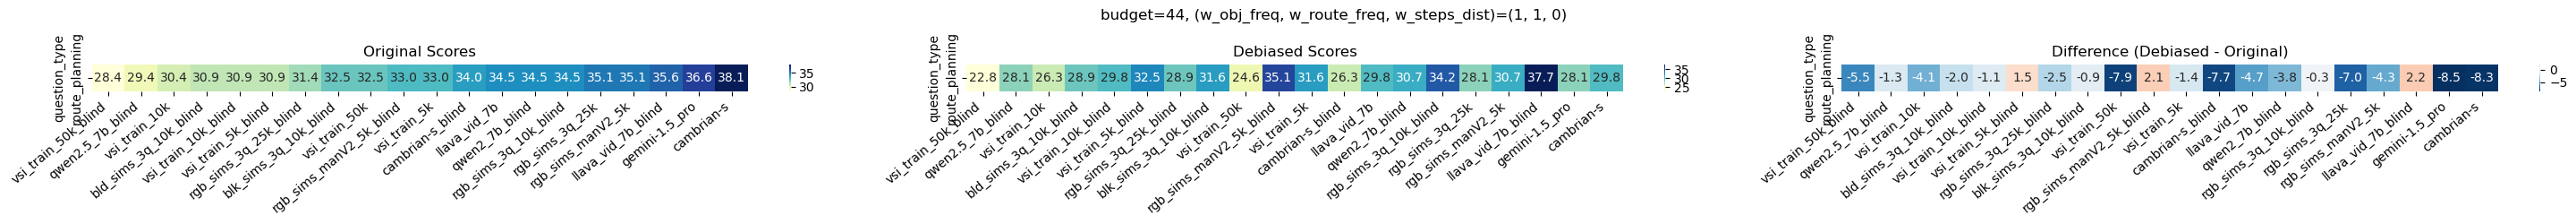

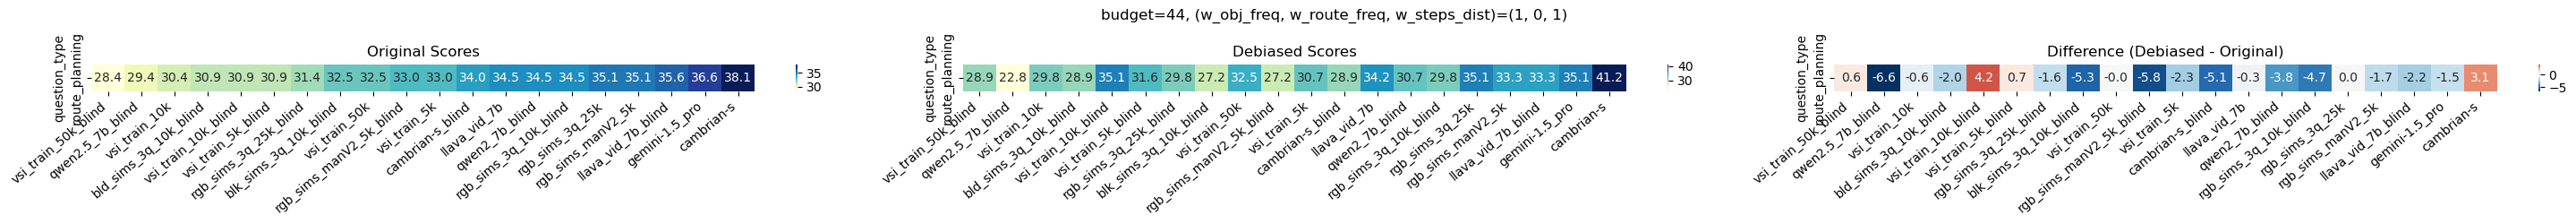

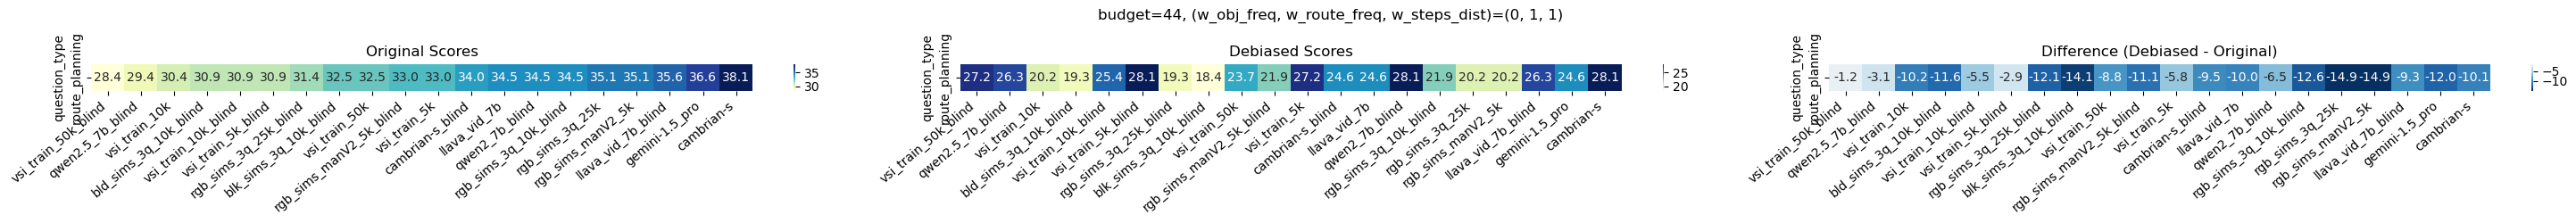

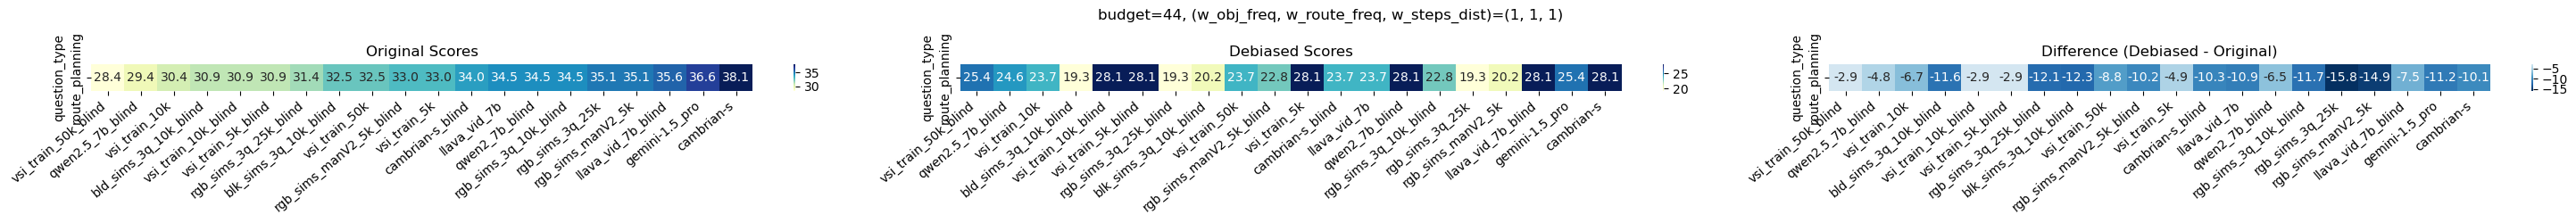

In [23]:
for (w_obj_freq, w_route_freq, w_steps_dist) in (
    (1, 0, 0),
    (0, 1, 0),
    (0, 0, 1),
    (1, 1, 0),
    (1, 0, 1),
    (0, 1, 1),
    (1, 1, 1),
):

    ids = dv.filter_route_planning_v2(qdf, budget=80, w_obj_freq=w_obj_freq, w_route_freq=w_route_freq, w_steps_dist=w_steps_dist, verbose=True)
    deb_qdf = qdf.loc[~qdf["id"].isin(ids)]
    removed_qdf = qdf.loc[qdf["id"].isin(ids)]
    print(f"Removed {len(removed_qdf)} samples from the dataset. Now {len(deb_qdf)} samples remain.")
    dv.visualize_debiasing_impact(qdf, deb_qdf, title=f"budget={budget}, (w_obj_freq, w_route_freq, w_steps_dist)=({w_obj_freq}, {w_route_freq}, {w_steps_dist})");

In [24]:
deb_qdf.ground_truth.value_counts()

ground_truth
B    29
C    29
A    28
D    28
Name: count, dtype: int64

In [25]:
removed_qdf.head()

,id,dataset,scene_name,question_type,question,ground_truth,options,bld_sims_3q_10k_blind,blk_sims_3q_10k_blind,cambrian-s,...,vsi_train_50k,vsi_train_50k_blind,vsi_train_5k,vsi_train_5k_blind,beginning_object,facing_object,target_object,gt_idx,gt_option,num_gt_steps
4936,4959,arkitscenes,42446167,route_planning,You are a robot beginning at the bed facing th...,C,"[A. Turn Back, Turn Left, B. Turn Left, Turn L...",0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,bed,tv,toilet,2,"Turn Left, Turn Right",2
4942,4965,scannetpp,c49a8c6cff,route_planning,You are a robot beginning at the door and faci...,C,"[A. Turn Left, B. Turn Back, C. Turn Right]",1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,door,window,monitor,2,Turn Right,1
4944,4967,scannet,scene0316_00,route_planning,You are a robot beginning at the door facing t...,A,"[A. Turn Left, Turn Left, B. Turn Back, Turn R...",0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,door,brown single-seat sofa,chair next to water fountain,0,"Turn Left, Turn Left",2
4946,4969,arkitscenes,42897508,route_planning,You are a robot beginning at the door and faci...,B,"[A. Turn Back, B. Turn Right, C. Turn Left]",0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,door,kitchen windows,stove,1,Turn Right,1
4947,4970,arkitscenes,42898581,route_planning,You are a robot beginning at the door and faci...,C,"[A. Turn Back, B. Turn Left, C. Turn Right]",1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,door,bed,table,2,Turn Right,1


In [26]:
a = dv.evaluate_models(qdf.loc[qdf["id"].isin(ids)])
b = dv.evaluate_models(qdf.loc[~qdf["id"].isin(ids)])
c = dv.evaluate_models(qdf)
d = b - c
# concat the dfs
# pd.concat([a, b], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased"})
# pd.concat([a, b, c], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original"})
pd.concat([a, b, c, d], axis=0, ignore_index=True).rename(index={0: "Removed", 1: "Debiased", 2: "Original", 3: "Difference"}).T.sort_values("Difference")

,Removed,Debiased,Original,Difference
rgb_sims_3q_25k,57.50,19.298246,35.051546,-15.753301
rgb_sims_manV2_5k,56.25,20.175439,35.051546,-14.876108
blk_sims_3q_10k_blind,50.00,20.175439,32.474227,-12.298788
rgb_sims_3q_25k_blind,48.75,19.298246,31.443299,-12.145053
rgb_sims_3q_10k_blind,51.25,22.807018,34.536082,-11.729065
bld_sims_3q_10k_blind,47.50,19.298246,30.927835,-11.629589
gemini-1.5_pro,52.50,25.438596,36.597938,-11.159342
llava_vid_7b,50.00,23.684211,34.536082,-10.851872
cambrian-s_blind,48.75,23.684211,34.020619,-10.336408
rgb_sims_manV2_5k_blind,47.50,22.807018,32.989691,-10.182673


In [27]:
models = dv.get_model_columns(deb_qdf)
deb_qdf[models].sum()

bld_sims_3q_10k_blind      22.0
blk_sims_3q_10k_blind      23.0
cambrian-s                 32.0
cambrian-s_blind           27.0
gemini-1.5_pro             29.0
llava_vid_7b               27.0
llava_vid_7b_blind         32.0
qwen2.5_7b_blind           28.0
qwen2_7b_blind             32.0
rgb_sims_3q_10k_blind      26.0
rgb_sims_3q_25k            22.0
rgb_sims_3q_25k_blind      22.0
rgb_sims_manV2_5k          23.0
rgb_sims_manV2_5k_blind    26.0
vsi_train_10k              27.0
vsi_train_10k_blind        32.0
vsi_train_50k              27.0
vsi_train_50k_blind        29.0
vsi_train_5k               32.0
vsi_train_5k_blind         32.0
dtype: float64

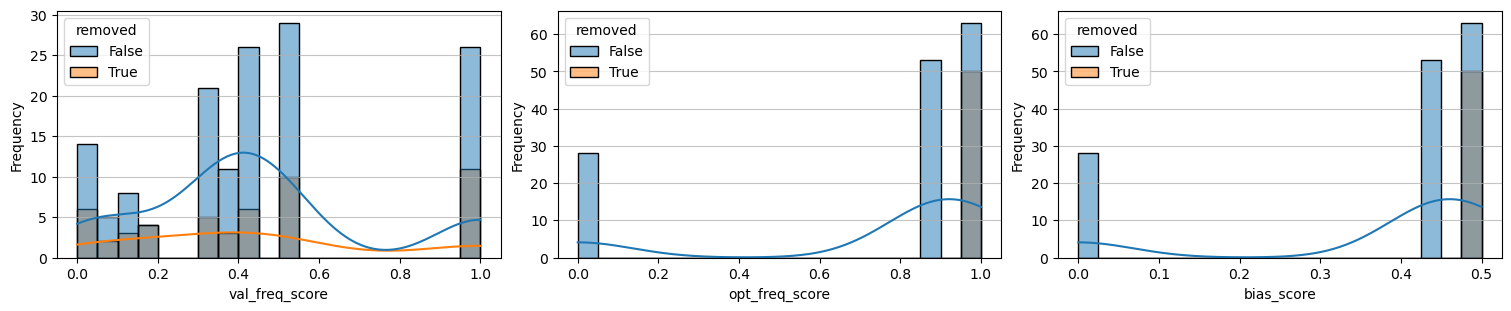

In [28]:
budget = 50

w_opt_freq = 1
w_val_freq = 0

remove_ids = dv.filter_route_planning_gt_freq(qdf, budget, w_val_freq=w_val_freq, w_opt_freq=w_opt_freq)
df_filtered = dv.get_route_planning_score(qdf, w_opt_freq=w_opt_freq, w_val_freq=w_val_freq)
df_sorted = df_filtered.sort_values("bias_score", ascending=False)
df_sorted["removed"] = df_sorted["id"].isin(remove_ids)


# scores = ["obj_freq_score", "val_freq_score", "combo_freq_score", "bias_score"]
# scores = ["pair_freq_score", "inv_var_score", "close_score", "bias_score"]
scores = [
    "val_freq_score",
    "opt_freq_score",
    "bias_score"
]

# Visualize the distribution of scores in subplots
fig, axes = plt.subplots(1, len(scores), figsize=(5*len(scores), 3), constrained_layout=True)
if len(scores) == 1:
    axes = [axes]  # Ensure axes is iterable even if there's only one score

for i, score in enumerate(scores):
    sns.histplot(data=df_sorted, x=score, bins=20, kde=True, hue="removed", ax=axes[i])
    axes[i].set_ylabel("Frequency")
    axes[i].grid(axis='y', alpha=0.75)
plt.show()

In [29]:
df_sorted[df_sorted["opt_freq_score"] == 1]["ground_truth"].value_counts()

ground_truth
A    57
Name: count, dtype: int64

In [30]:
df_sorted.sort_values("gt_opt_freq", ascending=False).head(3)

,id,dataset,scene_name,question_type,question,ground_truth,options,bld_sims_3q_10k_blind,blk_sims_3q_10k_blind,cambrian-s,...,target_object,gt_idx,gt_option,num_gt_steps,gt_val_freq,gt_opt_freq,val_freq_score,opt_freq_score,bias_score,removed
5129,5155,arkitscenes,42446529,route_planning,You are a robot beginning at the closet and fa...,A,"[A. Turn Right, Turn Left, Turn Left, B. Turn ...",0.0,1.0,1.0,...,black nightstand,0,"Turn Right, Turn Left, Turn Left",3,5,57,0.111111,1.0,0.5,True
5122,5148,arkitscenes,41069043,route_planning,You are a robot beginning at the tv remote and...,A,"[A. Turn Back, Turn Left, Turn Right, B. Turn ...",0.0,0.0,1.0,...,window,0,"Turn Back, Turn Left, Turn Right",3,2,57,0.027778,1.0,0.5,True
5036,5059,scannet,scene0500_00,route_planning,You are a robot beginning at the blackboard an...,A,"[A. Turn Right, Turn Right, Turn Left, B. Turn...",0.0,0.0,0.0,...,door,0,"Turn Right, Turn Right, Turn Left",3,4,57,0.083333,1.0,0.5,True


In [31]:
import numpy as np # Added for mean/std calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer # Added make_scorer for cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score # Added KFold and cross_val_score
from sklearn.preprocessing import LabelEncoder

def evaluate_rf_bias_cv(scored_df: pd.DataFrame, n_splits: int = 5) -> tuple[float, float, pd.DataFrame]:
    """
    Trains and evaluates a RandomForestClassifier using k-fold cross-validation
    on non-visual features of object_rel_distance questions to predict the
    ground truth answer ('A'/'B'/'C'/'D').

    Args:
        scored_df: DataFrame containing features and the 'ground_truth' target column.
                Expected features: 'object_1', 'object_2', 'object_3', 'object_4',
                                    'target_object', 'gt_obj_prob', 'pair_prob',
                                    'ord_pair_prob'.
        n_splits: Number of folds for StratifiedKFold cross-validation.

    Returns:
        A tuple containing:
        - mean_accuracy (float): Mean accuracy across the cross-validation folds.
        - std_accuracy (float): Standard deviation of accuracy across the folds.
        - feature_importance_df (pd.DataFrame | None): DataFrame with feature importances
        from a model trained on the full dataset, or None if calculation fails.
    """
    print(f"--- Starting RF Bias Evaluation (CV with {n_splits} splits) ---")

    # --- 1. Select Features and Target ---
    feature_cols = [
        "beginning_object", "facing_object", "target_object",
        'num_gt_steps',
        'val_freq_score',
        # 'opt_freq_score',
    ]
    target_col = 'ground_truth'

    # Check for essential columns
    required_cols = feature_cols + [target_col]
    missing_cols = [col for col in required_cols if col not in scored_df.columns]
    if missing_cols:
        print(f"Error: Input DataFrame is missing required columns: {missing_cols}")
        raise ValueError(f"Missing required columns: {missing_cols}")

    # Create a working copy and drop rows with missing values in relevant columns
    data = scored_df[required_cols].copy()
    initial_rows = len(data)
    data.dropna(inplace=True)
    final_rows = len(data)
    if final_rows < initial_rows:
        print(f"Warning: Dropped {initial_rows - final_rows} rows due to missing values in features or target.")

    if data.empty:
        print("Error: DataFrame is empty after dropping NA. Cannot proceed.")
        raise ValueError("DataFrame is empty after dropping NA.")

    X = data[feature_cols]
    y = data[target_col]

    print(f"Using {len(X)} samples for evaluation.")

    # --- 2. Preprocess Features ---
    encoders = {}
    X_encoded = X.copy()
    categorical_cols = X.select_dtypes(include='object').columns

    if not categorical_cols.empty:
        print(f"Encoding categorical features: {list(categorical_cols)}")
        for col in categorical_cols:
            encoders[col] = LabelEncoder()
            # Fit on the entire column before cross-validation
            X_encoded[col] = encoders[col].fit_transform(X_encoded[col].astype(str))
    else:
        print("No categorical features found to encode.")

    # --- 3. Define Model and Cross-Validation Strategy ---
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Adjust n_splits if necessary based on class distribution
    min_samples_per_class = y.value_counts().min()
    if min_samples_per_class < n_splits:
        print(f"Warning: The least populated class has only {min_samples_per_class} samples.")
        if min_samples_per_class < 2:
            print("Error: The least populated class has less than 2 samples. Cannot perform stratified CV.")
            raise ValueError("Insufficient samples in the smallest class for stratified CV.")
        print(f"Reducing n_splits from {n_splits} to {min_samples_per_class} to match the smallest class size.")
        n_splits = min_samples_per_class

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # --- 4. Perform Cross-Validation ---
    print(f"Performing {n_splits}-Fold Cross-Validation...")
    try:
        # Use cross_val_score to get accuracy for each fold
        scores = cross_val_score(model, X_encoded, y, cv=cv, scoring='accuracy', n_jobs=-1)
        mean_accuracy = np.mean(scores)
        std_accuracy = np.std(scores)
        print(f"Scores for each fold: {scores}")
        print(f"Mean Accuracy: {mean_accuracy:.4f}")
        print(f"Standard Deviation of Accuracy: {std_accuracy:.4f}")
    except ValueError as e:
        print(f"Error during cross-validation: {e}")
        print("This might happen if a fold doesn't contain samples from all classes, especially with small datasets.")
        return np.nan, np.nan, None # Return NaN if CV fails

    # --- 5. Train Final Model and Get Feature Importances ---
    feature_importance_df = None # Initialize as None
    print("\nTraining final model on all data to get feature importances...")
    try:
        final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        final_model.fit(X_encoded, y)
        importances = final_model.feature_importances_
        feature_importance_df = pd.DataFrame({'feature': X_encoded.columns, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)
        print("\nFeature Importances (from final model trained on all data):")
        print(feature_importance_df)
    except Exception as e:
        print(f"Could not calculate feature importances: {e}")

    print("--- Evaluation Complete ---")
    return mean_accuracy, std_accuracy, feature_importance_df

In [32]:
evaluate_rf_bias_cv(df_sorted, n_splits=30);

--- Starting RF Bias Evaluation (CV with 30 splits) ---
Using 194 samples for evaluation.
Encoding categorical features: ['beginning_object', 'facing_object', 'target_object']
Reducing n_splits from 30 to 28 to match the smallest class size.
Performing 28-Fold Cross-Validation...
Scores for each fold: [0.28571429 0.28571429 0.42857143 0.28571429 0.28571429 0.
 0.42857143 0.14285714 0.14285714 0.42857143 0.         0.
 0.14285714 0.28571429 0.14285714 0.14285714 0.14285714 0.14285714
 0.57142857 0.14285714 0.         0.14285714 0.14285714 0.57142857
 0.28571429 0.28571429 0.66666667 0.16666667]
Mean Accuracy: 0.2389
Standard Deviation of Accuracy: 0.1746

Training final model on all data to get feature importances...

Feature Importances (from final model trained on all data):
            feature  importance
0     target_object    0.287969
1  beginning_object    0.261806
2     facing_object    0.258212
3    val_freq_score    0.146021
4      num_gt_steps    0.045993
--- Evaluation Comple

In [33]:
evaluate_rf_bias_cv(df_sorted[~df_sorted["removed"]], n_splits=5);

--- Starting RF Bias Evaluation (CV with 5 splits) ---
Using 144 samples for evaluation.
Encoding categorical features: ['beginning_object', 'facing_object', 'target_object']
Performing 5-Fold Cross-Validation...
Scores for each fold: [0.27586207 0.44827586 0.20689655 0.31034483 0.35714286]
Mean Accuracy: 0.3197
Standard Deviation of Accuracy: 0.0808

Training final model on all data to get feature importances...

Feature Importances (from final model trained on all data):
            feature  importance
0     target_object    0.291718
1     facing_object    0.254283
2  beginning_object    0.252917
3    val_freq_score    0.148363
4      num_gt_steps    0.052719
--- Evaluation Complete ---


In [34]:
df_sorted[df_sorted["removed"]]["ground_truth"].value_counts()

ground_truth
A    50
Name: count, dtype: int64

In [35]:
evaluate_rf_bias_cv(df_sorted[df_sorted["removed"]], n_splits=5);

--- Starting RF Bias Evaluation (CV with 5 splits) ---
Using 50 samples for evaluation.
Encoding categorical features: ['beginning_object', 'facing_object', 'target_object']
Performing 5-Fold Cross-Validation...
Scores for each fold: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
Standard Deviation of Accuracy: 0.0000

Training final model on all data to get feature importances...

Feature Importances (from final model trained on all data):
            feature  importance
0  beginning_object         0.0
1     facing_object         0.0
2     target_object         0.0
3      num_gt_steps         0.0
4    val_freq_score         0.0
--- Evaluation Complete ---
